# Analysis of random correlaor

In [16]:
import ADerrors as AD
import Plots
import Random
using LaTeXStrings
import CorrelatorAnalysis as CA

Creat a random correlator with a certain autocorrelation and error.

In [17]:
rng = Random.MersenneTwister(154)
Nₜ, N_cnfg = 16, 1000

τ = 4
A_exact, m_exact = 1e-2, 0.1
σ_rel = 0.005

corr = Array{Float64}(undef, Nₜ, N_cnfg)
for (iₜ, t) in enumerate(0:Nₜ-1)
    μ = A_exact*cosh(m_exact*(t - Nₜ/2))
    corr[iₜ, :] = CA.markov_chain(rng, N_cnfg, μ, σ_rel*μ, τ)
end

Allocate AD.uwreal objects and plot them.

The function `CA.plot_correlator` computes the error of $C_t$ automatically, but we can also do it manually using `CA.err!`

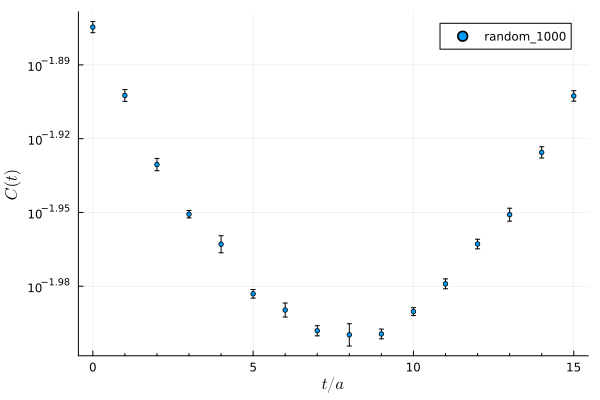

In [18]:
# Correlator
mcid = "random_1000"
Cₜ = CA.uwreal_array(corr, mcid, :auto)

p = CA.plot_correlator(Cₜ)
display(p)

Get the integrated autocorrelation time $\tau$ for one correlator entry and plot normalized autocorrelation together with the expected exponential decay of it.

τ = 3.669117369714799


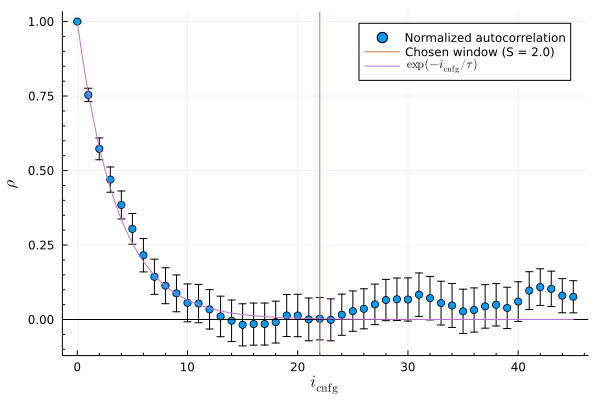

In [19]:
τ = AD.taui(Cₜ[10], mcid)
@show τ

CA.plot_autocorrelation(Cₜ[10], mcid, markersize=4)
Plots.plot!(x -> exp(-x/τ), label=L"\exp(-i_{\mathrm{cnfg}}/\tau)")

Fold the correlator.

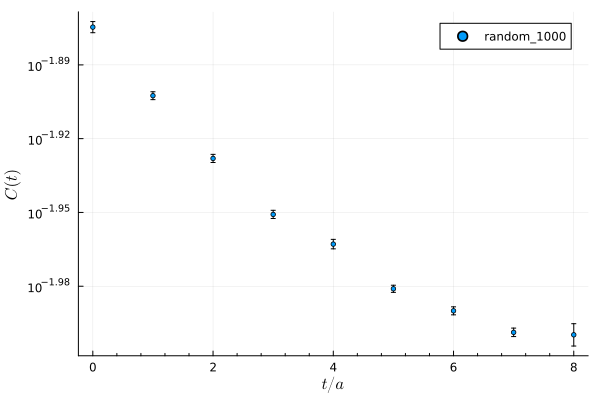

In [20]:
Cₜ_folded = CA.fold_correlator(Cₜ)

p = CA.plot_correlator(Cₜ_folded)
display(p)

Compute the effective mass of the non-folded and the folded correlator. The error can be propagated using `CA.err!`.

For that we use the $\cosh$ definition of the effective mass for symmetric correlators.

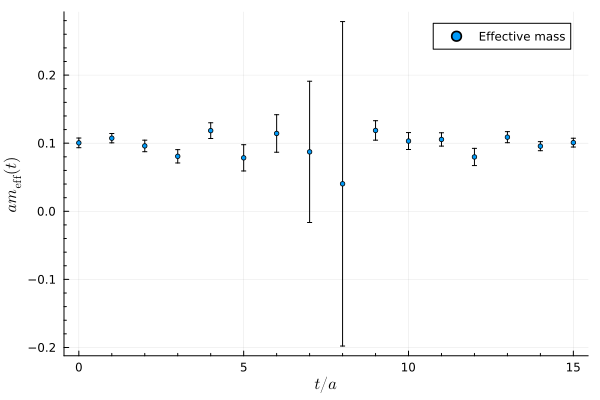

In [22]:
am_eff = CA.effective_mass(Cₜ, :cosh)

p = Plots.plot()
CA.plot_effective_mass!(am_eff)
display(p)

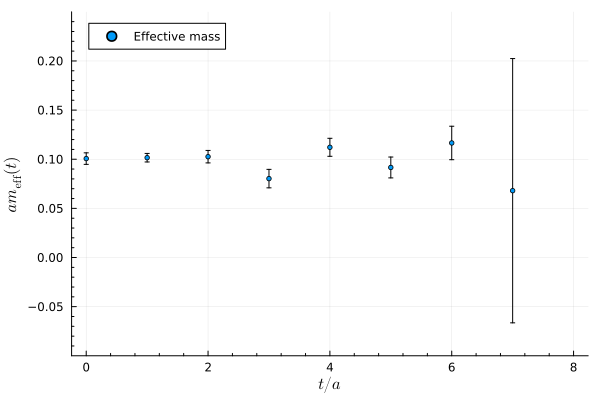

In [28]:
am_eff_folded = CA.effective_mass(Cₜ_folded, :cosh, folded=true)
CA.err!.(am_eff_folded)

p = Plots.plot(ylim=[-0.1, 0.25])
CA.plot_effective_mass!(am_eff_folded)
display(p)

Make a constant fit to the effective mass for the non-folded and the folded correlator to compute the "energy of the lowest state" in our toy model.

We print the resulting masses but also the reduced $\chi^2$ and the p-value which are computed as described in arXiv:2209.14188.

In [38]:
plateau_range = [3, 13]

fit_result = CA.fit_plateau(am_eff, plateau_range)
am = CA.err!(fit_result.param[1])

@show am
println("reduced χ² = $(fit_result.χ²_red)")
println("p-value = $(fit_result.p_value)")

am = 0.10093967673700785 +/- 0.0016542721763713314
reduced χ² = 0.8479107176540032
p-value = 0.35525


In [39]:
plateau_range_folded = [2, 6]

fit_result_folded = CA.fit_plateau(am_eff_folded, plateau_range_folded)
am_folded = CA.err!(fit_result_folded.param[1])

@show am_folded;
println("reduced χ² = $(fit_result_folded.χ²_red)")
println("p-value = $(fit_result_folded.p_value)")

am_folded = 0.09845971237913594 +/- 0.0014414062719442376
reduced χ² = 1.2217435137523456
p-value = 0.17834


Plot the effective mass together with the constant fit to plateau.

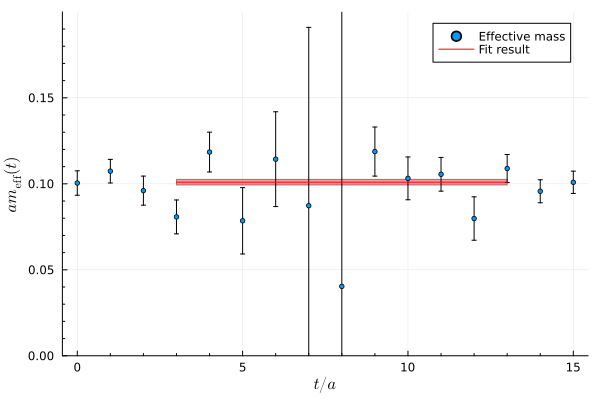

In [35]:
p = Plots.plot(ylim=[0, 0.2])
CA.plot_effective_mass!(am_eff)
CA.plot_error_rectangle!(am, plateau_range)
display(p)

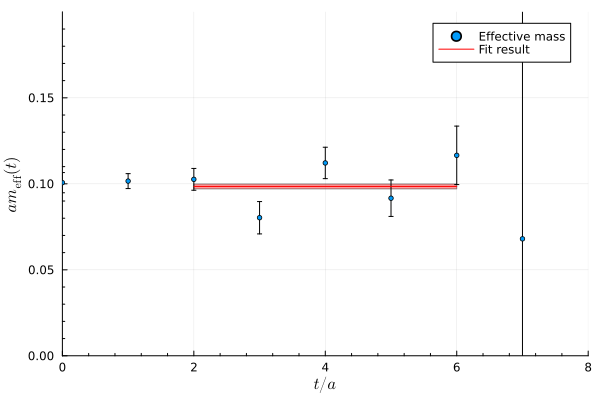

In [37]:
# Plot effective mass of folded correlator with fit to plateau
p = Plots.plot(xlim=[:auto, :auto], ylim=[0, 0.2])
CA.plot_effective_mass!(am_eff_folded)
CA.plot_error_rectangle!(am_folded, plateau_range_folded)
display(p)